<a href="https://colab.research.google.com/github/gnldyd/Kaggle/blob/main/Istanbul_Stock_Exchange/istanbul_stock_exchange_202172213.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021 1st semester - machine learning - 1st assignment

ISTANBUL STOCK EXCHANGE 

202172213 Hwiyong Chang

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from tqdm import tqdm

0. Load data

0.1. Make data frame

In [ ]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx'
url = './drive/MyDrive/Colab Notebooks/data/data_akbilgic.xlsx'
data = pd.read_excel(url, header=1)
data.head()

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
data.rename(columns = {'ISE': 'ISE_TL', 'ISE.1': 'ISE_USD'}, inplace=True)
data.head()

,date,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


0.2. Check NaN data

In [ ]:
data.isnull().sum()

date       0
ISE_TL     0
ISE_USD    0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
dtype: int64

0.3. set columns of x, y and make x, y

In [ ]:
x_column = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']
y_column = ['ISE_TL']

x_data = data[x_column]
y_data = data[y_column]

print(x_data.head())
print(y_data.head())

         SP       DAX      FTSE    NIKKEI   BOVESPA        EU        EM
0 -0.004679  0.002193  0.003894  0.000000  0.031190  0.012698  0.028524
1  0.007787  0.008455  0.012866  0.004162  0.018920  0.011341  0.008773
2 -0.030469 -0.017833 -0.028735  0.017293 -0.035899 -0.017073 -0.020015
3  0.003391 -0.011726 -0.000466 -0.040061  0.028283 -0.005561 -0.019424
4 -0.021533 -0.019873 -0.012710 -0.004474 -0.009764 -0.010989 -0.007802
     ISE_TL
0  0.035754
1  0.025426
2 -0.028862
3 -0.062208
4  0.009860


0.4. set random seed

In [ ]:
random_number = 202172213 # use random seed

1. Regularized Linear Regression

1.1. Visualizing the dataset : This dataset is divided into three parts: training, cross validation and test

1.1.1. dataset normalization and add intercept

In [ ]:
# Part to use if you want to normalize.
# (No normalization was performed on the data.)
#x_data_scale = StandardScaler().fit(x_data).transform(x_data)
#x_data = pd.DataFrame(x_data_scale, columns=x_data.columns)

# Add intercept(=bias)
x_data.insert(0, 'intercept', [1.0] * len(x_data))
x_data.head()

,intercept,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,1.0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,1.0,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,1.0,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,1.0,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,1.0,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


1.1.2. split dataset (train, validation, test)

In [ ]:
# train, validation, test = 6 : 2 : 2
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=random_number)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=random_number)

print("Sum of data count =", len(x_data), "\n")
print("Train data count =", len(x_train))
print("Validation data count =", len(x_val))
print("Test data count =", len(x_test))

Sum of data count = 536 

Train data count = 321
Validation data count = 107
Test data count = 108


1.1.3. Visualizing the dataset

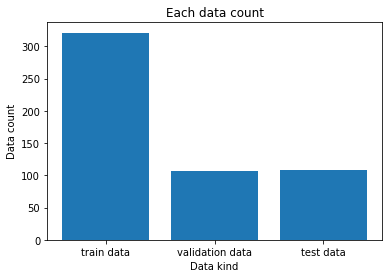

In [ ]:
count = [len(x_train), len(x_val), len(x_test)]
plt.bar(np.arange(len(count)), count)
plt.xticks(np.arange(len(count)), ['train data', 'validation data', 'test data'])
plt.xlabel('Data kind')
plt.ylabel('Data count')
plt.title('Each data count')
plt.show()

1.2. Identifying Cost function

1.2.1 initialization theta

Initialize random theta

In [ ]:
np.random.seed(random_number)
theta = np.random.rand(len(x_train.columns))
theta

array([0.07302274, 0.54924431, 0.54857186, 0.08458252, 0.21992765,
       0.43625602, 0.32534117, 0.29624251])

1.2.2. define non-regularized cost function

In [ ]:
def cost(x, t, y):
  m = len(x)
  loss = 0
  for i in range(m):
    loss += (x.iloc[i].dot(t) - y.iloc[i].item()) ** 2
  loss /= 2 * m
  return loss

1.2.3. define non-regularized gradient descent

In [ ]:
def gradient_descent(x, t, y):
  n = len(t)
  m = len(x)
  descent = np.zeros(n)
  for i in range(m):
    descent[0] = (x.iloc[i].dot(t) - y.iloc[i])
  descent[0] /= m
  for j in range(1, n):
    for i in range(m):
      descent[j] += (x.iloc[i].dot(t) - y.iloc[i]) * x.iloc[i][j]
    descent[j] /= m
  return descent

1.2.4. calculate non-regularized cost and non-regularized gradient descent

In [ ]:
print('x_train shape =', x_train.shape)
print('theta shape =', theta.shape) # intercept(1) + columns(7)
print('y_train shape =', y_train.shape)
print('Non-regularized cost value =', cost(x_train, theta, y_train))
print('Non-regularized gradient descent =', gradient_descent(x_train, theta, y_train))

x_train shape = (321, 8)
theta shape = (8,)
y_train shape = (321, 1)
Non-regularized cost value = 0.0028932660419988647
Non-regularized gradient descent = [0.00020818 0.00024062 0.0002545  0.00016673 0.00014479 0.00030276
 0.00018452 0.00018992]


1.3. Applying regularized linear regression gradient

1.3.1. define regularized cost function

The reason index starts from 1 is that theta should exclude the intercept value.

In [ ]:
def cost_regularized(x, t, y, lambda_value):
  loss = cost(x, t, y) # use non-regularized cost function
  n = len(t)
  regularized = 0
  for coefficient_index in range(1, n):
    regularized += t[coefficient_index] ** 2
  loss += lambda_value * regularized / (2 * len(x))
  return loss

1.3.2. define regularized gradient descent

As with the regularized_cost function, the reason index starts from 1 is that theta should exclude the intercept value.

In [ ]:
def gradient_descent_regularized(x, t, y, lambda_value):
  descent = gradient_descent(x, t, y) # use non-regularized gradient_descent function
  n = len(t)
  for j in range(1, n):
    descent[j] += lambda_value * t[j] / len(x)
  return descent

1.3.3. set lambda value

In [ ]:
lambda_value = 10.24 # example

1.3.4. calculate regularized cost and regularized gradient descent

In [ ]:
print('Regularized cost value =', cost_regularized(x_train, theta, y_train, lambda_value))
print('Regularized gradient descent =', gradient_descent_regularized(x_train, theta, y_train, lambda_value))

Regularized cost value = 0.019514103363968128
Regularized gradient descent = [0.00020818 0.01776168 0.01775411 0.00286494 0.00716055 0.01421946
 0.01056301 0.00964014]


1.4. Fitting linear regression

1.4.1. define train function

1. Save original theta
2. Cost value calculation
3. Theta update

In [ ]:
def train(learing_rate, epochs, x, t, y, lambda_value):
  cost_history = []
  # comment 1
  original_t = t.copy()
  for _ in tqdm(range(epochs)):
    # comment 2
    cost_history.append(cost_regularized(x, t, y, lambda_value))
    # comment 3
    t -= learning_rate * gradient_descent_regularized(x, t, y, lambda_value)
  return cost_history, original_t, t

1.4.2. set hyperparameter

In [ ]:
learning_rate = 0.1
epochs = 100
print('Learning rate =', learning_rate)
print('Training epoch =', epochs)

Learning rate = 0.1
Training epoch = 100


1.4.3. training

100%|██████████| 100/100 [03:11<00:00,  1.91s/it]


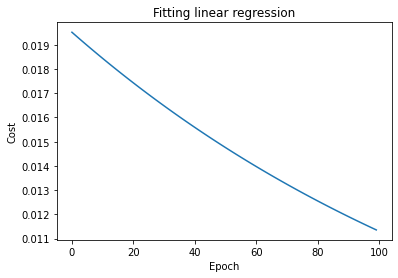

In [ ]:
cost_history, original_theta, theta = train(learning_rate, epochs, x_train, theta, y_train, lambda_value)

plt.plot(cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Fitting linear regression')
plt.show()

1.4.4. Comparison of theta before and after training

In [ ]:
print("Before train theta = ", original_theta)
print("After train theta = ", theta)

Before train theta =  [0.07302274 0.54924431 0.54857186 0.08458252 0.21992765 0.43625602
 0.32534117 0.29624251]
After train theta =  [0.07100148 0.39734606 0.39679429 0.06038537 0.15873781 0.31479323
 0.23517954 0.21389154]


1.5. Show the trade-off between bias and variance through learning curve

1.5.1. set lambda values

Optimal performance in the following range

In [ ]:
lambdas = [0.01 * 2 ** i for i in range(14, 19)]
#lambdas.insert(0, 0) # When lambda is 0, it outputs a large cost value, so it is excluded.
lambdas

[163.84, 327.68, 655.36, 1310.72, 2621.44]

1.5.2. train each learning curve

Each training uses original_theta

In [ ]:
all_cost_history = []
thetas = []
for lam in lambdas:
  cost_history, original_theta, theta = train(learning_rate, epochs, x_train, original_theta, y_train, lam)
  all_cost_history.append(cost_history)
  thetas.append(theta)

100%|██████████| 100/100 [03:15<00:00,  1.95s/it]


1.5.3. Compare learning curve

When training for each lambda value, the cost value decreases compared

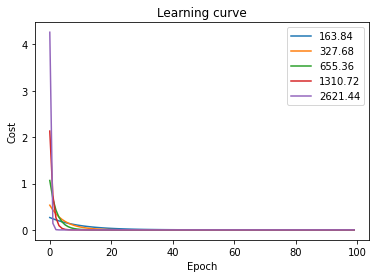

In [ ]:
for lambda_index in range(len(lambdas)):
  plt.plot(all_cost_history[lambda_index], label = str(lambdas[lambda_index]))
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Learning curve')
plt.legend(loc='upper right')
plt.show()

1.5.4. Optimal lambda for validation dataset

Compare cost values for each lambda

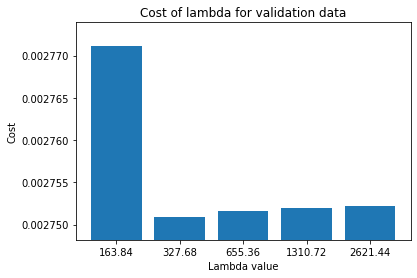

In [ ]:
costs = []
for lambda_index in range(len(lambdas)):
  costs.append(cost_regularized(x_val, thetas[lambda_index], y_val, lambdas[lambda_index]))

plt.bar(np.arange(len(costs)), costs)
plt.xticks(np.arange(len(lambdas)), lambdas)
plt.ylim(0.999 * min(costs), 1.001 * max(costs))
plt.xlabel('Lambda value')
plt.ylabel('Cost')
plt.title('Cost of lambda for validation data')
plt.show()

1.5.5. Minimum cost model performance

Import the model with the best performance through the validation dataset and evaluate the performance using the test dataset.

In [ ]:
min_index = costs.index(min(costs))
print('Lambda value of minimum cost model =', lambdas[min_index])
print('Test data cost of minimum cost model =', cost_regularized(x_test, thetas[min_index], y_test, lambdas[min_index]))

Lambda value of minimum cost model = 327.68
Test data cost of minimum cost model = 0.002350049656772313


1.5.6. Formulation

In [ ]:
print(y_column[0], '=', thetas[min_index][0], '+', ' + '.join([str(thetas[min_index][i]) + ' * ' + str(x_train.columns[i]) for i in range(1, len(theta))]))

ISE_TL = 0.0711502468524219 + 5.895828916371263e-05 * SP + 8.54136862474832e-05 * DAX + 0.00011091231310115706 * FTSE + 8.900543075159315e-06 * NIKKEI + 4.241588426064304e-05 * BOVESPA + 0.0001245381674459938 * EU + 3.8801789615209525e-05 * EM


2. Polynomial regression

2.1. Learning polynomial regression

2.1.1 transform data for polynomial regression

1. Intercept is removed because intercept is mixed while transforming into polynomial.

2. Transform the expression from which the intercept has been removed into a polynomial up to the quadratic equation. (intercpet is also added automatically.)

3. Check that the number of features has changed.

In [ ]:
# comment 1
x_train_poly = x_train.drop('intercept', axis=1)
x_val_poly = x_val.drop('intercept', axis=1)
x_test_poly = x_test.drop('intercept', axis=1)

# comment 2
x_train_poly = pd.DataFrame(PolynomialFeatures(degree=2).fit_transform(x_train_poly))
x_val_poly = pd.DataFrame(PolynomialFeatures(degree=2).fit_transform(x_val_poly))
x_test_poly = pd.DataFrame(PolynomialFeatures(degree=2).fit_transform(x_test_poly))

# comment 3
print('x_train shape =', x_train.shape)
print('x_train_poly shape =', x_train_poly.shape)
print(x_train_poly)

x_train shape = (321, 8)
x_train_poly shape = (321, 36)
      0         1         2   ...            33            34            35
0    1.0  0.000146  0.002831  ...  9.142840e-06  9.755650e-06  1.040953e-05
1    1.0 -0.014387 -0.017306  ...  4.002585e-04  3.060986e-04  2.340897e-04
2    1.0  0.000827 -0.006403  ...  2.621036e-05 -1.590526e-05  9.651809e-06
3    1.0  0.002296  0.001974  ...  1.709594e-05  3.226538e-05  6.089485e-05
4    1.0  0.016451  0.006506  ...  6.951471e-05  4.236109e-05  2.581413e-05
..   ...       ...       ...  ...           ...           ...           ...
316  1.0 -0.000951 -0.002764  ...  1.091048e-05  1.103983e-05  1.117071e-05
317  1.0 -0.008366 -0.003812  ...  1.753787e-05  9.962373e-07  5.659118e-08
318  1.0  0.015710  0.024040  ...  3.190608e-04  2.271847e-04  1.617650e-04
319  1.0 -0.011476 -0.000205  ...  6.270021e-06  2.043388e-05  6.659361e-05
320  1.0  0.003038 -0.003421  ...  2.278124e-07  1.771797e-06  1.378004e-05

[321 rows x 36 columns]


2.1.2 make theta for polynomial regression

initializate theta for polynomial regression

In [ ]:
np.random.seed(random_number)
theta_poly = np.random.rand(x_train_poly.shape[1])
theta_poly

array([0.07302274, 0.54924431, 0.54857186, 0.08458252, 0.21992765,
       0.43625602, 0.32534117, 0.29624251, 0.0445379 , 0.80213105,
       0.05138941, 0.30849016, 0.95098137, 0.29026558, 0.56526911,
       0.92287307, 0.24040091, 0.71160376, 0.36083   , 0.82905962,
       0.05983775, 0.84026759, 0.34075022, 0.37304541, 0.56550656,
       0.75225944, 0.08428083, 0.28257323, 0.6570534 , 0.25377638,
       0.17611565, 0.02146311, 0.38718472, 0.41047757, 0.79855391,
       0.1109822 ])

2.1.3 learning for polynomial regression

100%|██████████| 100/100 [15:07<00:00,  9.08s/it]


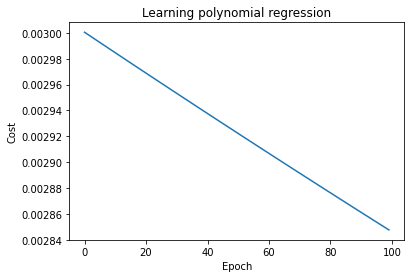

In [ ]:
# train
cost_history_poly, original_theta_poly, theta_poly = train(learning_rate, epochs, x_train_poly, theta_poly, y_train, 0.0)

plt.plot(cost_history_poly)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Learning polynomial regression')
plt.show()

2.2. Adjusting the regularization parameter

2.2.1. set lambda values

Lambda for polynomial Regerssion only

In [ ]:
lambdas_poly = [0.01 * 2 ** i for i in range(6)]
lambdas_poly.insert(0, 0)
lambdas_poly

[0, 0.01, 0.02, 0.04, 0.08, 0.16, 0.32]

2.2.2. training polynomial regression

In [ ]:
all_cost_history_poly = []
thetas_poly = []
for lam in lambdas_poly:
  cost_history_poly, original_theta_poly, theta_poly = train(learning_rate, epochs, x_train_poly, original_theta_poly, y_train, lam)
  all_cost_history_poly.append(cost_history_poly)
  thetas_poly.append(theta_poly)

100%|██████████| 100/100 [14:37<00:00,  8.78s/it]


2.3. Selecting lambda using a cross validation set

Compare cost values for each lambda

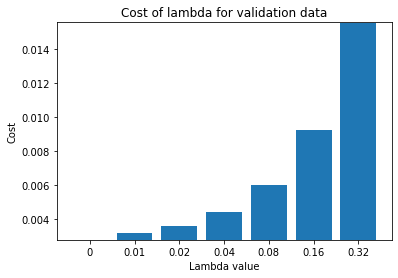

In [ ]:
costs_poly = []
for lambda_index in range(len(lambdas_poly)):
  costs_poly.append(cost_regularized(x_val_poly, thetas_poly[lambda_index], y_val, lambdas_poly[lambda_index]))

plt.bar(np.arange(len(costs_poly)), costs_poly)
plt.xticks(np.arange(len(lambdas_poly)), lambdas_poly)
plt.ylim(0.999 * min(costs_poly), 1.001 * max(costs_poly))
plt.xlabel('Lambda value')
plt.ylabel('Cost')
plt.title('Cost of lambda for validation data')
plt.show()

2.4. Computing test set error

Performance evaluation by importing the model that showed the best performance through the validation dataset

In [ ]:
min_index_poly = costs_poly.index(min(costs_poly))
print('Lambda value of minimum cost model =', lambdas_poly[min_index_poly])
print('Test data cost of minimum cost model =', cost_regularized(x_test_poly, thetas_poly[min_index_poly], y_test, lambdas_poly[min_index_poly]))

Lambda value of minimum cost model = 0
Test data cost of minimum cost model = 0.0030882032882109385


3. Save to PDF file

In [ ]:
#!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/istanbul_stock_exchange_202172213.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/istanbul_stock_exchange_202172213.ipynb to PDF
[NbConvertApp] Support files will be in istanbul_stock_exchange_202172213_files/
[NbConvertApp] Making directory ./istanbul_stock_exchange_202172213_files
[NbConvertApp] Making directory ./istanbul_stock_exchange_202172213_files
[NbConvertApp] Making directory ./istanbul_stock_exchange_202172213_files
[NbConvertApp] Making directory ./istanbul_stock_exchange_202172213_files
[NbConvertApp] Making directory ./istanbul_stock_exchange_202172213_files
[NbConvertApp] Making directory ./istanbul_stock_exchange_202172213_files
[NbConvertApp] Writing 69938 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully crea